**做了四個方法**
**效果都很差**

1.LightGBM

2.LightGBM + SMOTE

3.LightGBM + PCA_80_35 

4.LightGBM + PCA_90_44

5.LightGBM + PCA_80_35 + SMOTE

6.LightGBM + PCA_90_44 + SMOTE

# import

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
import warnings
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


# read file

In [2]:
file_path = "../data/filled_data_label_numeric.xlsx"
filled_data_label_numeric_df = pd.read_excel(file_path,engine='openpyxl')

# 1. LightGBM

沒有使用平衡處理的情況下，所有目標都被當成0

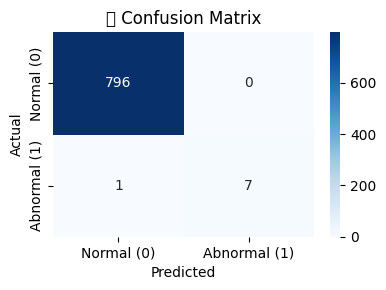


📄 分類報告：
              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      0.88      0.93         8

    accuracy                           1.00       804
   macro avg       1.00      0.94      0.97       804
weighted avg       1.00      1.00      1.00       804



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 關掉警告與 LightGBM log
warnings.filterwarnings("ignore")

# ===== 1. 特徵與目標 =====
X = filled_data_label_numeric_df.drop(columns=['abnormal_target'])
y = filled_data_label_numeric_df['abnormal_target']

# ===== 2. 資料標準化（LightGBM 不強制需要）=====
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===== 3. 切分訓練與測試資料 =====
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# ===== 4. 建立 LightGBM 模型（不處理平衡）=====
lgbm_model = LGBMClassifier(random_state=42, verbose=-1)
lgbm_model.fit(X_train, y_train)

# ===== 5. 預測 =====
y_pred = lgbm_model.predict(X_test)

# ===== 6. 視覺化混淆矩陣 =====
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Normal (0)", "Abnormal (1)"],
            yticklabels=["Normal (0)", "Abnormal (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📊 Confusion Matrix")
plt.tight_layout()
plt.show()

# ===== 7. 分類報告 =====
print("\n📄 分類報告：")
print(classification_report(y_test, y_pred, target_names=["Normal (0)", "Abnormal (1)"]))


# 2. LightGBM + SMOTE

8個全部都抓到

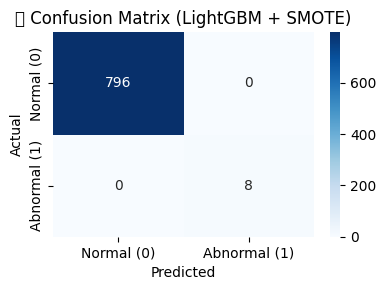


📄 分類報告：
              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      1.00      1.00         8

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804



In [9]:
# 關掉不必要的警告
warnings.filterwarnings("ignore")

# ===== 1. 特徵與目標 =====
X = filled_data_label_numeric_df.drop(columns=['abnormal_target'])
y = filled_data_label_numeric_df['abnormal_target']

# ===== 2. 資料標準化 =====
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===== 3. 切分訓練與測試資料 =====
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# ===== 4. 套用 SMOTE 過採樣（只對訓練集）=====
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ===== 5. 建立 LightGBM 模型 =====
lgbm_model = LGBMClassifier(random_state=42, verbose=-1)
lgbm_model.fit(X_train_resampled, y_train_resampled)

# ===== 6. 預測 =====
y_pred = lgbm_model.predict(X_test)

# ===== 7. 視覺化混淆矩陣 =====
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Normal (0)", "Abnormal (1)"],
            yticklabels=["Normal (0)", "Abnormal (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📊 Confusion Matrix (LightGBM + SMOTE)")
plt.tight_layout()
plt.show()

# ===== 8. 分類報告 =====
print("\n📄 分類報告：")
print(classification_report(y_test, y_pred, target_names=["Normal (0)", "Abnormal (1)"]))


🌱 Seed 0:


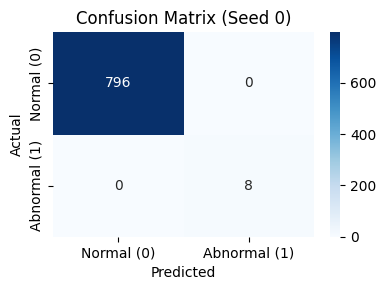

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      1.00      1.00         8

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804

❗ 預測錯誤的 serial_no：
[]

🌱 Seed 1:


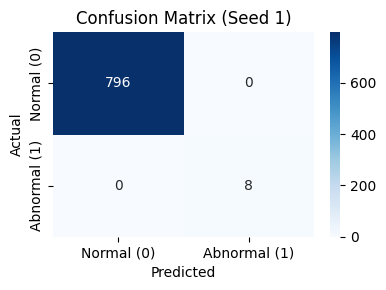

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      1.00      1.00         8

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804

❗ 預測錯誤的 serial_no：
[]

🌱 Seed 2:


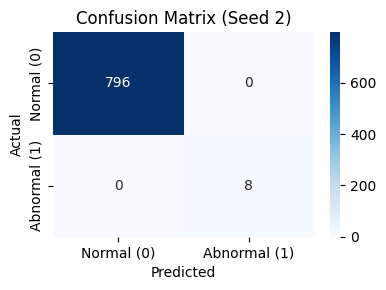

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      1.00      1.00         8

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804

❗ 預測錯誤的 serial_no：
[]

🌱 Seed 3:


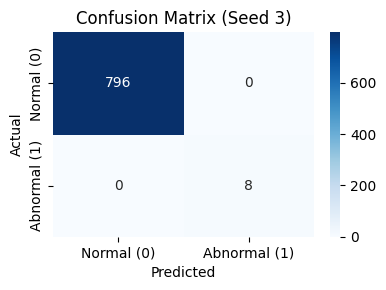

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      1.00      1.00         8

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804

❗ 預測錯誤的 serial_no：
[]

🌱 Seed 4:


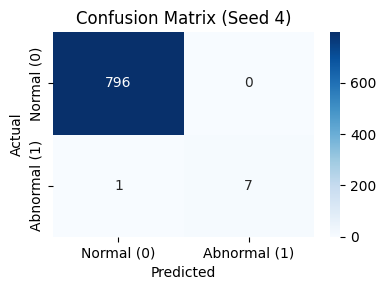

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      0.88      0.93         8

    accuracy                           1.00       804
   macro avg       1.00      0.94      0.97       804
weighted avg       1.00      1.00      1.00       804

❗ 預測錯誤的 serial_no：
['agnt_1768']

🌱 Seed 5:


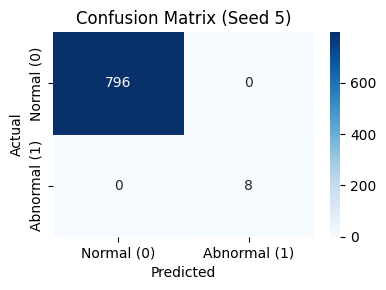

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      1.00      1.00         8

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804

❗ 預測錯誤的 serial_no：
[]

🌱 Seed 6:


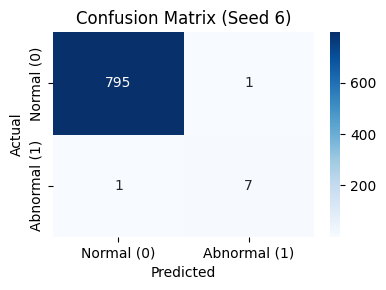

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       0.88      0.88      0.88         8

    accuracy                           1.00       804
   macro avg       0.94      0.94      0.94       804
weighted avg       1.00      1.00      1.00       804

❗ 預測錯誤的 serial_no：
['agnt_1805', 'agnt_2498']

🌱 Seed 7:


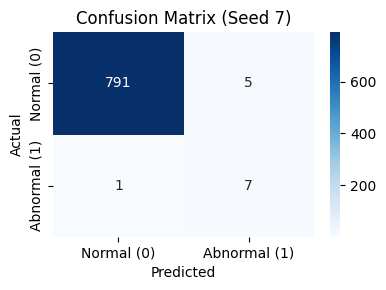

              precision    recall  f1-score   support

  Normal (0)       1.00      0.99      1.00       796
Abnormal (1)       0.58      0.88      0.70         8

    accuracy                           0.99       804
   macro avg       0.79      0.93      0.85       804
weighted avg       0.99      0.99      0.99       804

❗ 預測錯誤的 serial_no：
['agnt_0487', 'agnt_2555', 'agnt_0348', 'agnt_0070', 'agnt_2498', 'agnt_3338']

🌱 Seed 8:


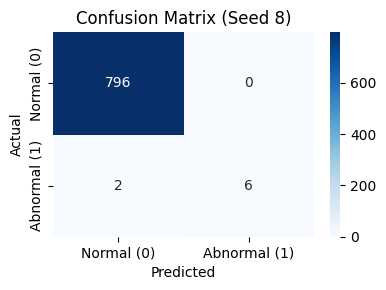

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      0.75      0.86         8

    accuracy                           1.00       804
   macro avg       1.00      0.88      0.93       804
weighted avg       1.00      1.00      1.00       804

❗ 預測錯誤的 serial_no：
['agnt_0441', 'agnt_1234']

🌱 Seed 9:


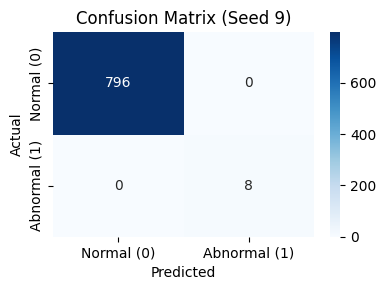

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      1.00      1.00         8

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804

❗ 預測錯誤的 serial_no：
[]

🌱 Seed 10:


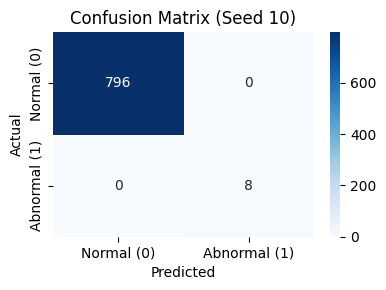

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      1.00      1.00         8

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804

❗ 預測錯誤的 serial_no：
[]

🌱 Seed 11:


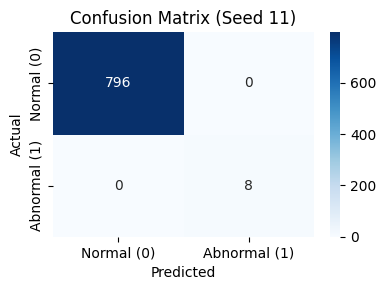

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      1.00      1.00         8

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804

❗ 預測錯誤的 serial_no：
[]

🌱 Seed 12:


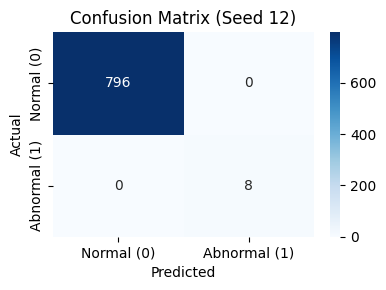

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      1.00      1.00         8

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804

❗ 預測錯誤的 serial_no：
[]

🌱 Seed 13:


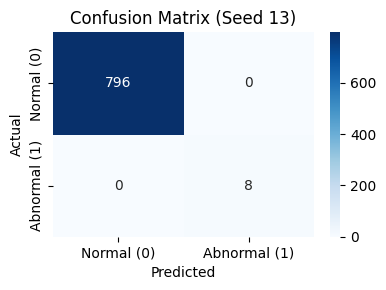

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      1.00      1.00         8

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804

❗ 預測錯誤的 serial_no：
[]

🌱 Seed 14:


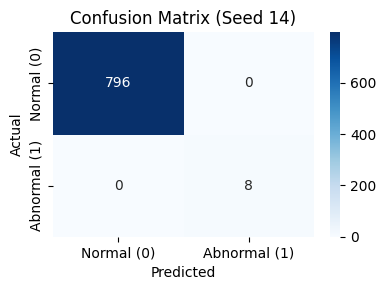

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      1.00      1.00         8

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804

❗ 預測錯誤的 serial_no：
[]


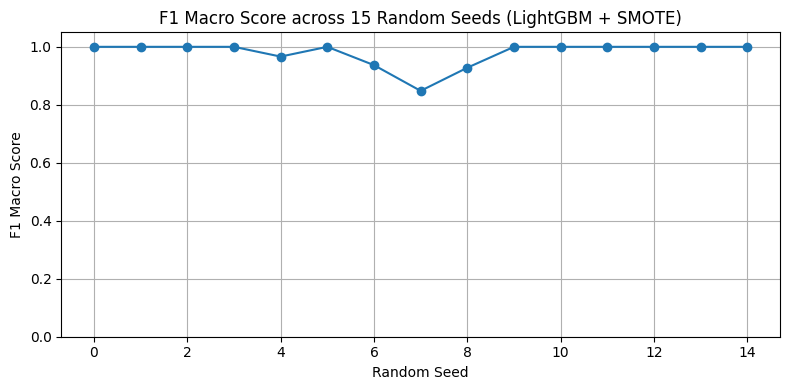


✅ 錯誤樣本已輸出至 'LightGBM_SMOTE_misclassified_rows.csv'，共 11 筆。


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# ===== 0. 合併 serial_no 到 filled_data_label_numeric_df =====
serials_df = pd.read_excel("../data/業務員資料0325V01.xlsx", sheet_name="DATA", engine="openpyxl", usecols=[0])
serials_df.columns = ["serial_no"]  # 確保欄位名稱統一
filled_data_label_numeric_df = pd.concat([serials_df, filled_data_label_numeric_df], axis=1)

# ===== 1. 特徵與目標（排除 serial_no）=====
X = filled_data_label_numeric_df.drop(columns=['serial_no', 'abnormal_target'])
y = filled_data_label_numeric_df['abnormal_target']

# ===== 2. 標準化 =====
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===== 3. 儲存第一次好結果的訓練集 =====
X_train_fixed, X_test_fixed, y_train_fixed, y_test_fixed = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

very_good_train_X = X_train_fixed
very_good_train_Y = y_train_fixed

# ===== 4. 多次測試 =====
results = []
misclassified_all = []

for seed in range(15):
    print(f"\n🌱 Seed {seed}:")

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=seed, stratify=y)

    smote = SMOTE(random_state=seed)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    model = LGBMClassifier(random_state=seed, verbose=-1)
    model.fit(X_train_resampled, y_train_resampled)

    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    results.append({"seed": seed, "f1_macro": f1})

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Normal (0)", "Abnormal (1)"],
                yticklabels=["Normal (0)", "Abnormal (1)"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix (Seed {seed})")
    plt.tight_layout()
    plt.show()

    print(classification_report(y_test, y_pred, target_names=["Normal (0)", "Abnormal (1)"]))

    # ===== 預測錯誤樣本擷取 =====
    y_test_reset = y_test.reset_index(drop=True)
    y_pred_series = pd.Series(y_pred)
    mismatch_index = (y_test_reset != y_pred_series)

    wrong_rows = filled_data_label_numeric_df.iloc[y_test.index[mismatch_index]].copy()
    wrong_rows["true_label"] = y_test_reset[mismatch_index].values
    wrong_rows["predicted_label"] = y_pred_series[mismatch_index].values
    wrong_rows["seed"] = seed
    wrong_rows["t0p1"] = ((wrong_rows["true_label"] == 0) & (wrong_rows["predicted_label"] == 1)).astype(int)
    wrong_rows["t1p0"] = ((wrong_rows["true_label"] == 1) & (wrong_rows["predicted_label"] == 0)).astype(int)

    # ✅ 印出該次錯誤的 serial_no
    print("❗ 預測錯誤的 serial_no：")
    print(wrong_rows["serial_no"].tolist())

    misclassified_all.append(wrong_rows)

# ===== 5. F1-score 彙整視覺化 =====
results_df = pd.DataFrame(results)

plt.figure(figsize=(8, 4))
plt.plot(results_df['seed'], results_df['f1_macro'], marker='o', linestyle='-')
plt.title('F1 Macro Score across 15 Random Seeds (LightGBM + SMOTE)')
plt.xlabel('Random Seed')
plt.ylabel('F1 Macro Score')
plt.ylim(0, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()

# ===== 6. 匯出所有預測錯誤的樣本（含 serial_no）=====
final_misclassified_df = pd.concat(misclassified_all, ignore_index=True)
final_misclassified_df.to_csv("../data/LightGBM_SMOTE_misclassified_rows.csv", index=False)
print(f"\n✅ 錯誤樣本已輸出至 'LightGBM_SMOTE_misclassified_rows.csv'，共 {len(final_misclassified_df)} 筆。")




✅ 最佳參數： {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 15}

🌱 Seed 0:


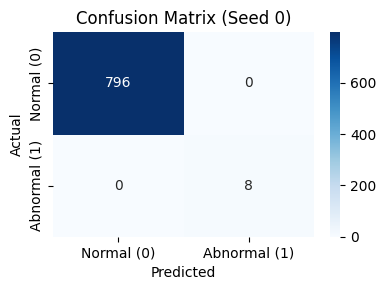

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      1.00      1.00         8

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804

❗ 錯誤 serial_no： []

🌱 Seed 1:


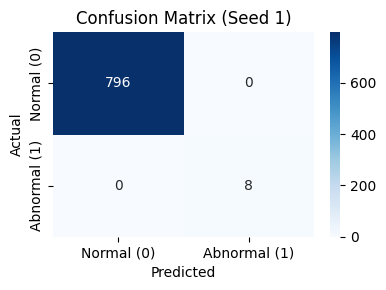

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      1.00      1.00         8

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804

❗ 錯誤 serial_no： []

🌱 Seed 2:


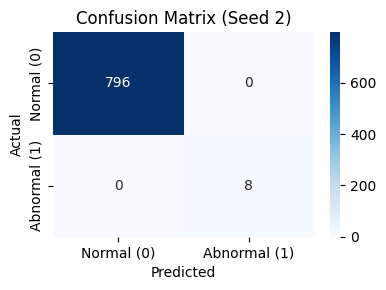

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      1.00      1.00         8

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804

❗ 錯誤 serial_no： []

🌱 Seed 3:


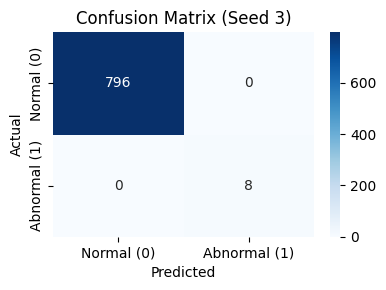

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      1.00      1.00         8

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804

❗ 錯誤 serial_no： []

🌱 Seed 4:


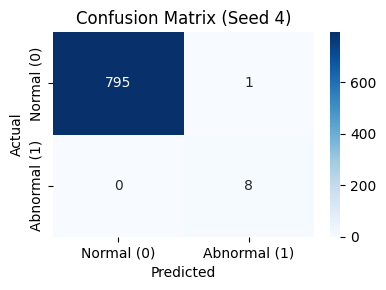

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       0.89      1.00      0.94         8

    accuracy                           1.00       804
   macro avg       0.94      1.00      0.97       804
weighted avg       1.00      1.00      1.00       804

❗ 錯誤 serial_no： ['agnt_1013']

🌱 Seed 5:


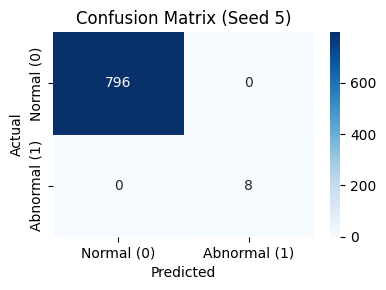

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      1.00      1.00         8

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804

❗ 錯誤 serial_no： []

🌱 Seed 6:


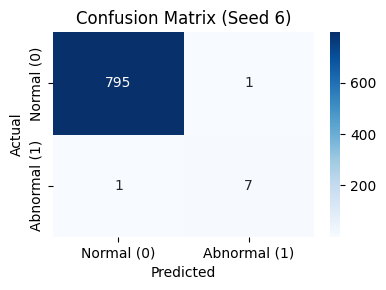

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       0.88      0.88      0.88         8

    accuracy                           1.00       804
   macro avg       0.94      0.94      0.94       804
weighted avg       1.00      1.00      1.00       804

❗ 錯誤 serial_no： ['agnt_3369', 'agnt_1805']

🌱 Seed 7:


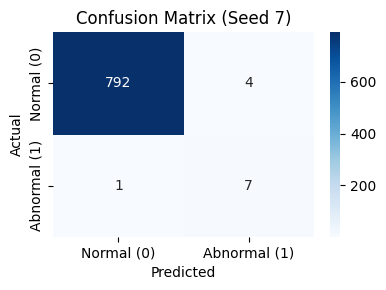

              precision    recall  f1-score   support

  Normal (0)       1.00      0.99      1.00       796
Abnormal (1)       0.64      0.88      0.74         8

    accuracy                           0.99       804
   macro avg       0.82      0.93      0.87       804
weighted avg       1.00      0.99      0.99       804

❗ 錯誤 serial_no： ['agnt_0487', 'agnt_0348', 'agnt_2874', 'agnt_3338', 'agnt_3369']

🌱 Seed 8:


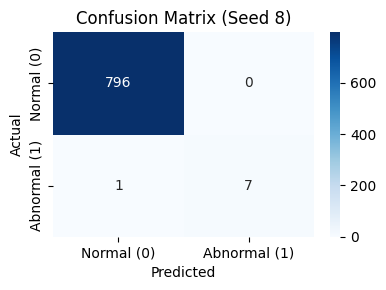

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      0.88      0.93         8

    accuracy                           1.00       804
   macro avg       1.00      0.94      0.97       804
weighted avg       1.00      1.00      1.00       804

❗ 錯誤 serial_no： ['agnt_1234']

🌱 Seed 9:


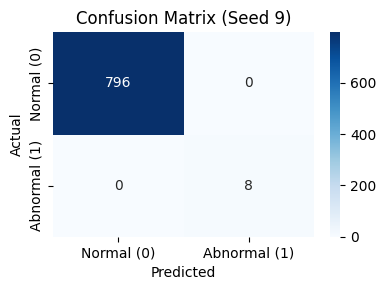

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      1.00      1.00         8

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804

❗ 錯誤 serial_no： []

🌱 Seed 10:


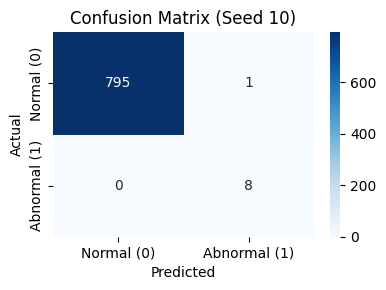

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       0.89      1.00      0.94         8

    accuracy                           1.00       804
   macro avg       0.94      1.00      0.97       804
weighted avg       1.00      1.00      1.00       804

❗ 錯誤 serial_no： ['agnt_3439']

🌱 Seed 11:


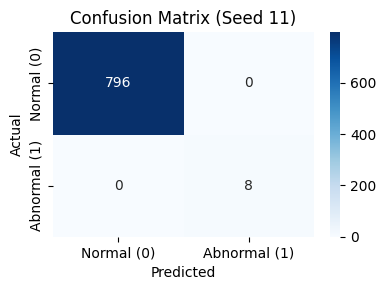

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      1.00      1.00         8

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804

❗ 錯誤 serial_no： []

🌱 Seed 12:


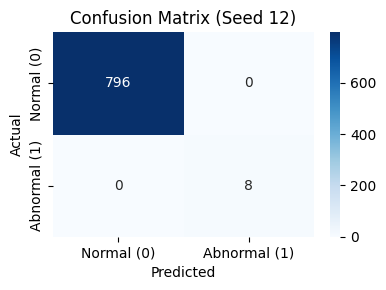

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      1.00      1.00         8

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804

❗ 錯誤 serial_no： []

🌱 Seed 13:


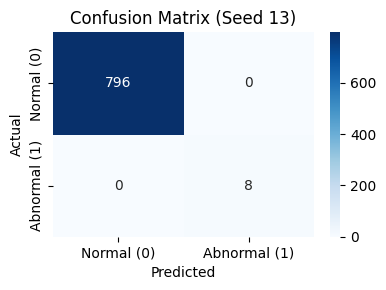

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      1.00      1.00         8

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804

❗ 錯誤 serial_no： []

🌱 Seed 14:


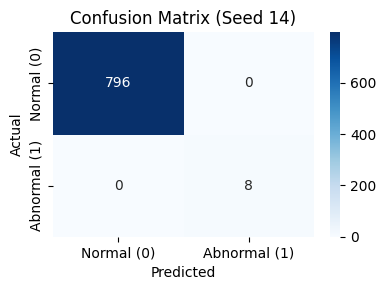

              precision    recall  f1-score   support

  Normal (0)       1.00      1.00      1.00       796
Abnormal (1)       1.00      1.00      1.00         8

    accuracy                           1.00       804
   macro avg       1.00      1.00      1.00       804
weighted avg       1.00      1.00      1.00       804

❗ 錯誤 serial_no： []


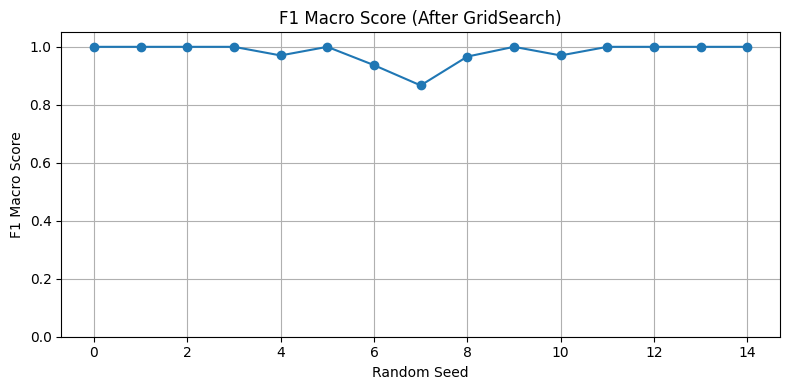


✅ GridSearch + 15 次後，錯誤樣本已儲存，共 10 筆。


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===== GridSearch 調參一次（固定 random_state=42）=====
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'num_leaves': [15, 31]
}

grid = GridSearchCV(
    estimator=LGBMClassifier(random_state=42, verbose=-1),
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1
)

grid.fit(X_train_resampled, y_train_resampled)
best_params = grid.best_params_
print("✅ 最佳參數：", best_params)

# ===== 用最佳參數重複跑 15 次 =====
results = []
misclassified_all = []

for seed in range(15):
    print(f"\n🌱 Seed {seed}:")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=seed, stratify=y)
    
    smote = SMOTE(random_state=seed)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    model = LGBMClassifier(random_state=seed, verbose=-1, **best_params)
    model.fit(X_train_resampled, y_train_resampled)

    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    results.append({"seed": seed, "f1_macro": f1})

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Normal (0)", "Abnormal (1)"],
                yticklabels=["Normal (0)", "Abnormal (1)"])
    plt.title(f"Confusion Matrix (Seed {seed})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    print(classification_report(y_test, y_pred, target_names=["Normal (0)", "Abnormal (1)"]))

    y_test_reset = y_test.reset_index(drop=True)
    y_pred_series = pd.Series(y_pred)
    mismatch_index = (y_test_reset != y_pred_series)

    wrong_rows = filled_data_label_numeric_df.iloc[y_test.index[mismatch_index]].copy()
    wrong_rows["true_label"] = y_test_reset[mismatch_index].values
    wrong_rows["predicted_label"] = y_pred_series[mismatch_index].values
    wrong_rows["seed"] = seed
    wrong_rows["t0p1"] = ((wrong_rows["true_label"] == 0) & (wrong_rows["predicted_label"] == 1)).astype(int)
    wrong_rows["t1p0"] = ((wrong_rows["true_label"] == 1) & (wrong_rows["predicted_label"] == 0)).astype(int)

    print("❗ 錯誤 serial_no：", wrong_rows["serial_no"].tolist())
    misclassified_all.append(wrong_rows)

# ===== 匯總 & F1 分數圖 =====
results_df = pd.DataFrame(results)

plt.figure(figsize=(8, 4))
plt.plot(results_df['seed'], results_df['f1_macro'], marker='o')
plt.title('F1 Macro Score (After GridSearch)')
plt.xlabel('Random Seed')
plt.ylabel('F1 Macro Score')
plt.ylim(0, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()

# ===== 匯出所有錯誤樣本（包含 serial_no）=====
final_misclassified_df = pd.concat(misclassified_all, ignore_index=True)
final_misclassified_df.to_csv("../data/LightGBM_SMOTE_misclassified_rows_tuned.csv", index=False)
print(f"\n✅ GridSearch + 15 次後，錯誤樣本已儲存，共 {len(final_misclassified_df)} 筆。")
####

# 3. LightGBM + PCA80_35

用了PCA後，一樣都變認不出來

In [17]:
PCA80_35_df = pd.read_csv("../data/PCA80_35.csv")
file_path = "../data/filled_data_label_numeric.xlsx"
filled_data_label_numeric_df = pd.read_excel(file_path,engine='openpyxl')

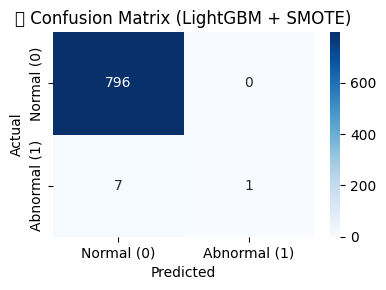


📄 分類報告：
              precision    recall  f1-score   support

  Normal (0)       0.99      1.00      1.00       796
Abnormal (1)       1.00      0.12      0.22         8

    accuracy                           0.99       804
   macro avg       1.00      0.56      0.61       804
weighted avg       0.99      0.99      0.99       804



In [20]:
warnings.filterwarnings("ignore")  # 避免警告干擾

# ===== 1. 特徵與目標（用 PCA80_35 當 X，原始表單取 y）=====
X = PCA80_35_df  # 降維後的特徵
y = filled_data_label_numeric_df['abnormal_target']  # 原始目標值

# ===== 2. 資料標準化（LightGBM 不強制需要，但為穩定性可保留）=====
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===== 3. 切分訓練與測試資料 =====
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# ===== 4. 建立 LightGBM 模型 =====
lgbm_model = LGBMClassifier(random_state=42, verbose=-1)
lgbm_model.fit(X_train, y_train)

# ===== 6. 預測 =====
y_pred = lgbm_model.predict(X_test)

# ===== 7. 視覺化混淆矩陣 =====
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Normal (0)", "Abnormal (1)"],
            yticklabels=["Normal (0)", "Abnormal (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📊 Confusion Matrix (LightGBM + SMOTE)")
plt.tight_layout()
plt.show()

# ===== 8. 分類報告 =====
print("\n📄 分類報告：")
print(classification_report(y_test, y_pred, target_names=["Normal (0)", "Abnormal (1)"]))

# 4. LightGBM + PCA90_44

用了PCA後，一樣都變認不出來

In [21]:
PCA90_44_df = pd.read_csv("../data/PCA90_44.csv")
file_path = "../data/filled_data_label_numeric.xlsx"
filled_data_label_numeric_df = pd.read_excel(file_path,engine='openpyxl')

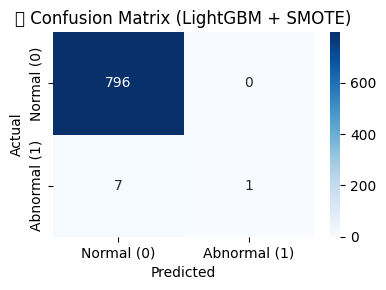


📄 分類報告：
              precision    recall  f1-score   support

  Normal (0)       0.99      1.00      1.00       796
Abnormal (1)       1.00      0.12      0.22         8

    accuracy                           0.99       804
   macro avg       1.00      0.56      0.61       804
weighted avg       0.99      0.99      0.99       804



In [22]:
warnings.filterwarnings("ignore")  # 避免警告干擾

# ===== 1. 特徵與目標（用 PCA80_35 當 X，原始表單取 y）=====
X = PCA90_44_df  # 降維後的特徵
y = filled_data_label_numeric_df['abnormal_target']  # 原始目標值

# ===== 2. 資料標準化（LightGBM 不強制需要，但為穩定性可保留）=====
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===== 3. 切分訓練與測試資料 =====
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# ===== 4. 建立 LightGBM 模型 =====
lgbm_model = LGBMClassifier(random_state=42, verbose=-1)
lgbm_model.fit(X_train, y_train)

# ===== 6. 預測 =====
y_pred = lgbm_model.predict(X_test)

# ===== 7. 視覺化混淆矩陣 =====
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Normal (0)", "Abnormal (1)"],
            yticklabels=["Normal (0)", "Abnormal (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📊 Confusion Matrix (LightGBM + SMOTE)")
plt.tight_layout()
plt.show()

# ===== 8. 分類報告 =====
print("\n📄 分類報告：")
print(classification_report(y_test, y_pred, target_names=["Normal (0)", "Abnormal (1)"]))

# 5. LightGBM + PCA80_35 + SMOTE

比不做SMOTE好一丟丟

In [23]:
PCA80_35_df = pd.read_csv("../data/PCA80_35.csv")
file_path = "../data/filled_data_label_numeric.xlsx"
filled_data_label_numeric_df = pd.read_excel(file_path,engine='openpyxl')

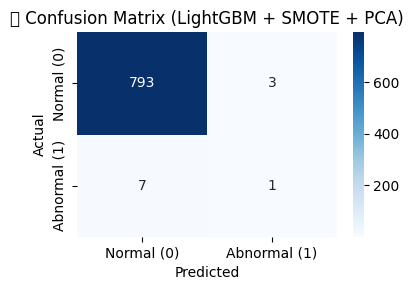


📄 分類報告：
              precision    recall  f1-score   support

  Normal (0)       0.99      1.00      0.99       796
Abnormal (1)       0.25      0.12      0.17         8

    accuracy                           0.99       804
   macro avg       0.62      0.56      0.58       804
weighted avg       0.98      0.99      0.99       804



In [24]:
warnings.filterwarnings("ignore")  # 避免警告干擾

# ===== 1. 特徵與目標（用 PCA80_35 當 X，原始表單取 y）=====
X = PCA80_35_df
y = filled_data_label_numeric_df['abnormal_target']

# ===== 2. 資料標準化（LightGBM 不強制，但建議保留）=====
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===== 3. 切分訓練與測試資料 =====
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# ===== 4. 套用 SMOTE（只對訓練資料）=====
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ===== 5. 建立 LightGBM 模型 =====
lgbm_model = LGBMClassifier(random_state=42, verbose=-1)
lgbm_model.fit(X_train_resampled, y_train_resampled)

# ===== 6. 預測 =====
y_pred = lgbm_model.predict(X_test)

# ===== 7. 視覺化混淆矩陣 =====
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Normal (0)", "Abnormal (1)"],
            yticklabels=["Normal (0)", "Abnormal (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📊 Confusion Matrix (LightGBM + SMOTE + PCA)")
plt.tight_layout()
plt.show()

# ===== 8. 分類報告 =====
print("\n📄 分類報告：")
print(classification_report(y_test, y_pred, target_names=["Normal (0)", "Abnormal (1)"]))

# 6. LightGBM + PCA90_44 + SMOTE

比不做SMOTE好一丟丟

In [25]:
PCA90_44_df = pd.read_csv("../data/PCA90_44.csv")
file_path = "../data/filled_data_label_numeric.xlsx"
filled_data_label_numeric_df = pd.read_excel(file_path,engine='openpyxl')

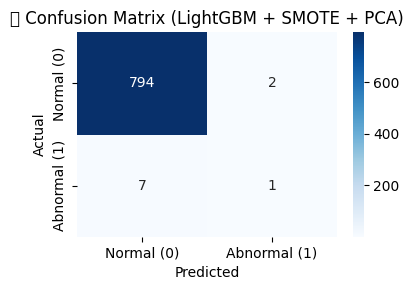


📄 分類報告：
              precision    recall  f1-score   support

  Normal (0)       0.99      1.00      0.99       796
Abnormal (1)       0.33      0.12      0.18         8

    accuracy                           0.99       804
   macro avg       0.66      0.56      0.59       804
weighted avg       0.98      0.99      0.99       804



In [26]:
warnings.filterwarnings("ignore")  # 避免警告干擾

# ===== 1. 特徵與目標（用 PCA80_35 當 X，原始表單取 y）=====
X = PCA90_44_df
y = filled_data_label_numeric_df['abnormal_target']

# ===== 2. 資料標準化（LightGBM 不強制，但建議保留）=====
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===== 3. 切分訓練與測試資料 =====
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# ===== 4. 套用 SMOTE（只對訓練資料）=====
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ===== 5. 建立 LightGBM 模型 =====
lgbm_model = LGBMClassifier(random_state=42, verbose=-1)
lgbm_model.fit(X_train_resampled, y_train_resampled)

# ===== 6. 預測 =====
y_pred = lgbm_model.predict(X_test)

# ===== 7. 視覺化混淆矩陣 =====
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Normal (0)", "Abnormal (1)"],
            yticklabels=["Normal (0)", "Abnormal (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📊 Confusion Matrix (LightGBM + SMOTE + PCA)")
plt.tight_layout()
plt.show()

# ===== 8. 分類報告 =====
print("\n📄 分類報告：")
print(classification_report(y_test, y_pred, target_names=["Normal (0)", "Abnormal (1)"]))